# Data Visualization with Haberman's Dataset

### Data set description 

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Download the dataset from here => https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1#haberman.csv
(Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999)

### Attribute information

1. Age of patient at time of operation (numerical).
2. Patient's year of operation (year - 1900, numerical).
3. Number of positive axillary nodes detected (numerical).
4. Survival status (class attribute) 
    1 = the patient survived 5 years or longer.
    2 = the patient died within 5 years.

Attributes 1, 2 and 3 form our features (independent variables), while attribute 4 is our class variable (dependent variable). 

### Objective 

Given the Age of patient, Year of operation and the Number of axillary nodes, predict the class label 1 or 2, that is classify whether the patient lived over 5 years or died within 5 years post operation. 


In [2]:
# Importing necessary packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# load the dataset

survival_df = pd.read_csv('haberman.csv', header = 0, 
                          names = ['patient_age', 'operation_year', 
                                   'positive_axillary_nodes', 
                                   'survival_status'])

survival_df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
survival_df.shape

(306, 4)

In [5]:
#unique values of target variable 

survival_df['survival_status'].unique()

array([1, 2], dtype=int64)

In [6]:
# Datatypes and general info

survival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age                306 non-null int64
operation_year             306 non-null int64
positive_axillary_nodes    306 non-null int64
survival_status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
# How many data points for each class are present?

survival_df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Observations : 
1. All the columns are of integer type.
2. There are no missing values in the dataset.
3. The dataset is imbalanced. The people who survived are nearly 3 times the people who didn't survive.   

In [8]:
# Check for missing values

survival_df.isnull().sum()

patient_age                0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

####  There are no missing values in the dataset so need of data imputation. 

### Some data preparation 

But status = 1 or status = 2 are not really much informative. Instead, we add an additional column "survival_status_after_5yrs" such that, if 

status = 1 => survival_status_after_5yrs = 'yes'

status = 2 => survival_status_after_5yrs = 'no'

In [9]:
survival_df['survival_status'] = survival_df['survival_status'].map({1:"yes", 2:"no"})

In [10]:
survival_df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [11]:
# Basic statistical description

survival_df.describe()

,patient_age,operation_year,positive_axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


### Observations : 

1. The mean age of the patients is about 52.5 years and the mean number of axillary nodes is about 4. But mean is not a good statistical measure here as some very high values of nodes will shift the mean number of nodes to higher value. The median value is 1.  
2. The max number of the axillary nodes is 52 and the 75th percentile is 4. It implies 75 percent of the Cancer patients have 4 or less axillary nodes.

In [12]:
# class-wise general statitical analysis 

survival_yes = survival_df[survival_df['survival_status'] == 'yes']
survival_yes.describe()                           

,patient_age,operation_year,positive_axillary_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [13]:
survival_no = survival_df[survival_df['survival_status'] == 'no']
survival_no.describe()                           

,patient_age,operation_year,positive_axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations: 

1. The mean age at which the patient is operated is nearly same in both cases. 

2. Patients who died within 5 years on an average had about 5 axillary lymph nodes more than the patients who lived over 5 years post operation. 

### Matplotlib Scatterplot 

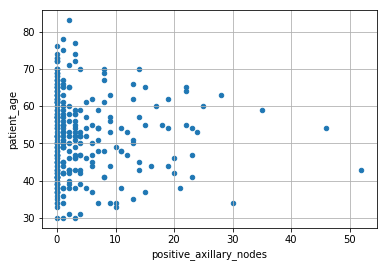

In [15]:
#plotting a 2-D scatterplot using Matplotlib library

survival_df.plot(kind= 'scatter', x= 'positive_axillary_nodes', y= 'patient_age') 
plt.grid()
plt.show()

The above plot gives us a good picture of how the number of axillary nodes vary with the age. 
Looking at the plot, following observations can be made - 

1. In most of the patients, the positive axillary nodes detected is typically in range 0 to 4. 

2. Most of these patients in age range of 40 to 60 years have higher number of axillary nodes as compared to patients in other age groups. 

3. Very few patients have 30 or above positive axillary nodes.

However, in above scatter plot we cannot draw any insights regarding how are these points distributed in each class label. That's were Python's Seaborn package comes into the picture!

### Seaborn Scatterplot

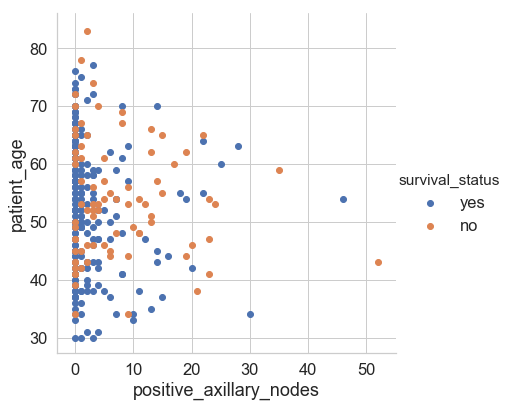

In [16]:
# 2-D Scatter plot with color-coding for each class.

sns.set(style = 'whitegrid', font_scale = 1.5)
sns.FacetGrid(survival_df, hue = 'survival_status', height = 6) \
   .map(plt.scatter, 'positive_axillary_nodes', 'patient_age') \
   .add_legend()

plt.show()

### Observations: 

Here we have got different color codes for the class labels - 'yes' and 'no'. It can be observed that - 

1. Most patients who had 0 positive auxiliary nodes survived over 5 years post operation.
2. Patients over 50 years of age with over 10 axillary nodes are less likely to survive over 5 years.

### Using the Seaborn pairplot to visualize the relationship between the variables in pairwise manner. 

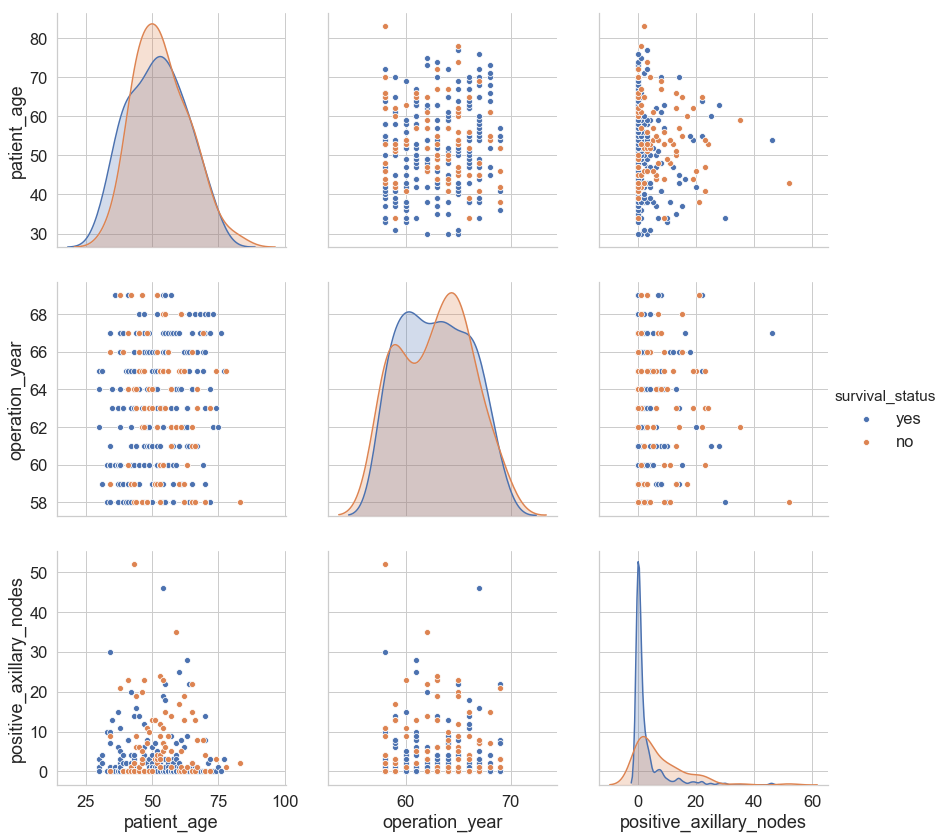

In [15]:
# pairwise scatter plot: Pair-Plot

sns.set(style = 'whitegrid', font_scale = 1.5)
sns.pairplot(survival_df, hue = 'survival_status', height = 4)
plt.show()

#### As seen in above pairplot, taking 2 variables at a time, there is a high overlap and no clear distinction can be made between the class labels based on any two features. 

#### Let's take a look at jointplot. 

### Seaborn Jointplot

C:\Users\Pratik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


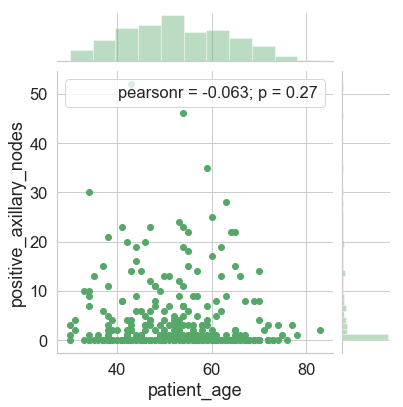

In [16]:
#plotting jointplot using seaborn library

sns.jointplot(survival_df['patient_age'], 
              survival_df['positive_axillary_nodes'], 
              color = 'g').annotate(stats.pearsonr)

plt.show()

### Observations:

1. The pair plot and the subsequent joint plot reveal that there is no correlation between the patient's age and number of positive axillary nodes. 
2. The histogram on the top of the plot reveals that most patients operated are around 50 years of age. 
3. The histogram on the right indicates that out of the patients who were operated, a high majority of them had 0 axillary nodes.

These above observations are consistent with the observations we made in previous sections.

### Probability Density Function (PDF)

Before we begin further analysis, we need to split the Data Frame according to the 2 distinct class-labels - survival status = 'yes' and survival status = 'no'

In [17]:
# 2 distinct class-labels - survival status = 'yes' and survival status = 'no'

survival_yes = survival_df[survival_df['survival_status'] == 'yes']

survival_no = survival_df[survival_df['survival_status'] == 'no']

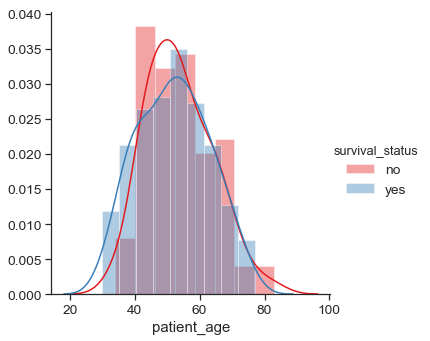

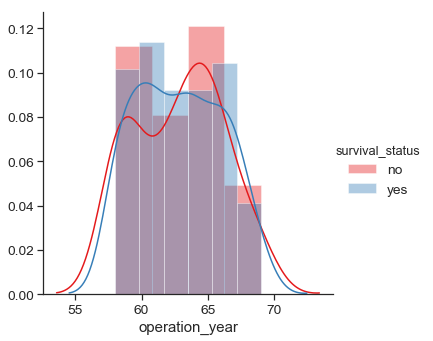

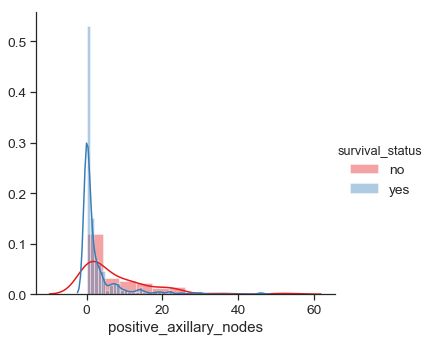

In [16]:
# Kernel density smoothed probaility density function plot 

sns.set(style = 'ticks', font_scale = 1.25, palette = 'Set1')
sns.FacetGrid(survival_df, hue="survival_status", height=5, hue_order=['no', 'yes']) \
   .map(sns.distplot, "patient_age") \
   .add_legend()

sns.FacetGrid(survival_df, hue='survival_status', height=5, hue_order=['no', 'yes']) \
   .map(sns.distplot, 'operation_year') \
   .add_legend();

sns.FacetGrid(survival_df, hue='survival_status', height=5, hue_order=['no', 'yes']) \
   .map(sns.distplot, 'positive_axillary_nodes') \
   .add_legend();


plt.show()

### Observations

#### PDF plot 1: Feature - Patient age
There is high overlap between the survival class labels - 'yes' and 'no' implying that the survival status of the patient post operation is independent of the patient's age.

Despite high overlap, if we observe carefully, we can vaguely tell that the likelihood of survival is highest among the patients in age group of 30–40 years.

#### PDF plot 2: Feature-Operation year
Just like the above PDF plot, here too there is a huge overlap between the class labels; indicating that the patient's survival status cannot be determined from the year in which he was operated.

#### PDF plot 3: Feature-Number of positive axillary nodes detected  

* This plot looks interesting! Although there is a good amount of overlap, here we can make a distinctive observation.

* Patients having 4 or less axillary nodes - Majority of these patients have survived 5 years and longer. 

* Patients having more than 4 axillary nodes - Patients having more than 4 axillary nodes - the likelihood of survival is pretty much less as compared to the patients having 4 or less axillary nodes.

### Cumulative Distribution Function (CDF)

[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
**************************************************
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


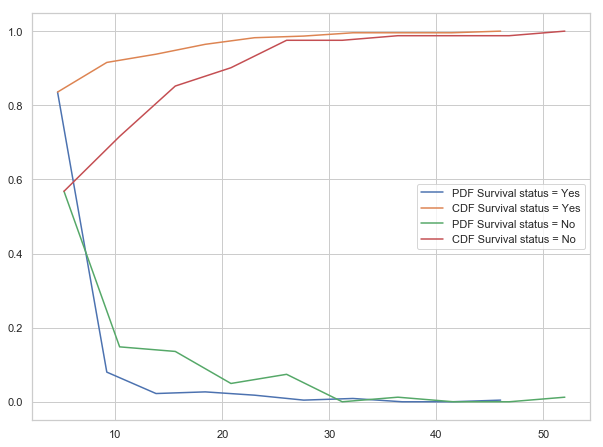

In [57]:
# Cumulative Distribution Function plot
#plot CDF of survival_status

sns.set(style="whitegrid") 
plt.figure(figsize=(10,7.5))

counts, bin_edges = np.histogram(survival_yes['positive_axillary_nodes'],
                                 bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

print(cdf)
print(bin_edges)

plt.plot(bin_edges[1:], pdf, label = 'PDF Survival status = Yes')
plt.plot(bin_edges[1:], cdf, label = 'CDF Survival status = Yes')

print('*'*50)

counts, bin_edges = np.histogram(survival_no['positive_axillary_nodes'],
                                 bins = 10, density = True)


pdf = counts/sum(counts)
cdf = np.cumsum(pdf)


print(cdf)
print(bin_edges)

plt.plot(bin_edges[1:], pdf, label = 'PDF Survival status = No')
plt.plot(bin_edges[1:], cdf, label = 'CDF Survival status = No')

plt.legend()
plt.show()


### Observations: 

1. Patients having 4 or less positive axillary nodes have about 84% chance of survival over 5 years post operation.

2. As the number of nodes increases, the chance of people dying within 5 years of operation also increases.

### Box Plots and Violin Plots

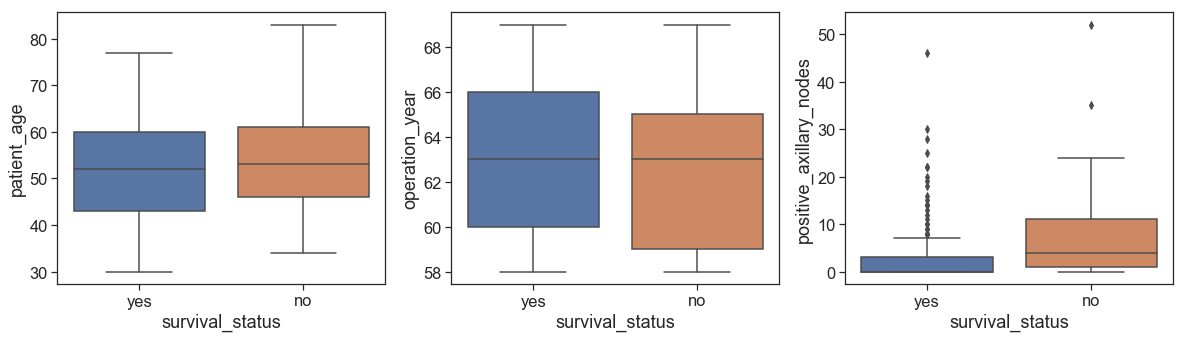

In [45]:
# Box-plot with whiskers: intutively visualizing the 1-D scatter plot.

sns.set(style="ticks") 
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'survival_status', y = 'patient_age', data = survival_df)

plt.subplot(1,3,2)
sns.boxplot(x = 'survival_status', y = 'operation_year', data = survival_df)

plt.subplot(1,3,3)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = survival_df)

plt.show()

### Obsrvations: 
The isolated points that can be seen in the box-plot of positive axillary nodes are the outliers in the data. One can typically expect such high number of outliers in most medical datasets. Also, it indicates that most of the patients who survived had less than 4 positive axillary nodes. This is consistent with our previous observations.

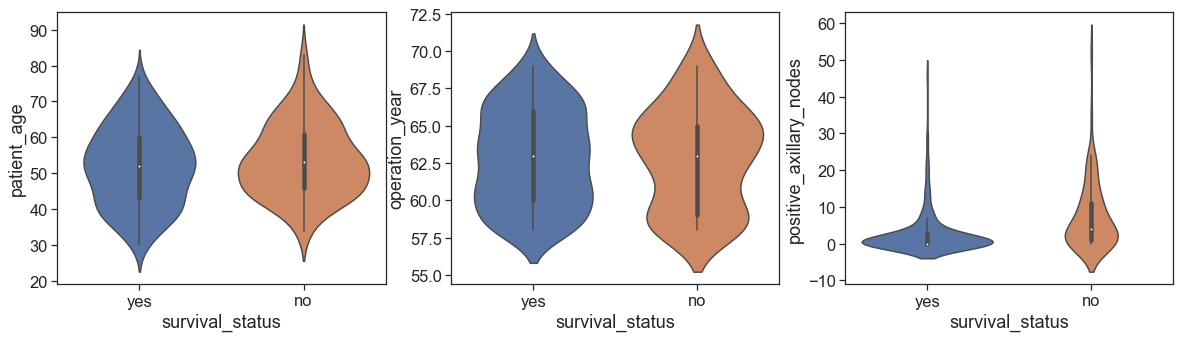

In [50]:
# A violin plot combines the benefits of the previous two plots and simplifies them.

# Denser regions  fatter representing high density(concentration) of data, 
# Sparser regionof the data are thinner representing low density of data.


sns.set(style="ticks") 
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.violinplot(x = 'survival_status', y = 'patient_age', data = survival_df)

plt.subplot(1,3,2)
sns.violinplot(x = 'survival_status', y = 'operation_year', data = survival_df)

plt.subplot(1,3,3)
sns.violinplot(x = 'survival_status', y = 'positive_axillary_nodes', data = survival_df)

plt.show()

### Observations: 
In the violin plot of positive axillary nodes, the difference in the distribution indicates that in absence of positive axillary nodes, there are large number of patients who survived as compared to the patients who didn't survive.


### Multivariate analyis using Contour Plot

C:\Users\Pratik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


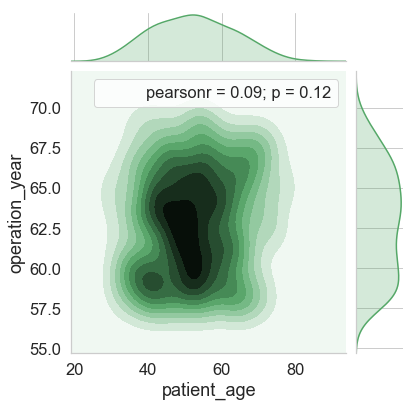

In [30]:
#2D Density plot, contour plot

sns.jointplot(x ='patient_age', y ='operation_year' , data = survival_df, kind = 'kde', color = 'g').annotate(stats.pearsonr)
plt.show()

### Observations: 
From the above contour plot it can be observed that the years 1959–1964 witnessed more patients in age group of 45–55 years.

## Summary: 
1. The mean age at which patients got operated is about 52.5 years. 75% of the patients had 4 or less positive axillary nodes detected. 


2. Patients who died within 5 years on an average had about 4 to 5 positive axillary nodes more than the patients who lived over 5 years post operation.


3. Very few patients had 20 or more positive axillary nodes detected. 


4. Majority of the Patients who didn't had any positive auxiliary node detected (i.e. positive_axillary_nodes = 0) survived for 5 years or longer post operation. Patients over 50 years of age with over 10 axillary nodes are less likely to survive for 5 years after operation. 


5. There is no correlation between the patient's age and number of positive axillary nodes detected. 


6. Patients are more likely to get operated in age of 40–60 years.


7. Among the patients who got operated, a good number of them had no positive axillary nodes detected and these patients have greater chance of survival over 5 years.


8. Patients having 4 or less positive axillary nodes have greater likelihood(~84%) of surviving 5 years or longer as compared to the patients having more than 4 positive axillary nodes. 


9. As the number of positive nodes detected increases, the chance of people dying within 5 years of operation also increases.


10. Absence of positive axillary nodes or having fewer positive axillary nodes doesn't guarantee survival over 5 years post operation.

### Conclusion

We deep dived into exploring the data and were able to obtain a number of insights as summarized above. 
Owing to the imbalance in data and high overlap between the class labels, it wasn't possible to construct a naive classification model using simple if-else conditions on the available data. Performing accurate prediction on a new patient would require additional complex techniques.

#                                                    *  *  * 

In [63]:
#survival_df[survival_df['positive_axillary_nodes'] == 0 ]['survival_status'].value_counts()
#survival_df[survival_df['positive_axillary_nodes'] > 4]['survival_status'].value_counts()
#survival_df[(survival_df['patient_age'] >= 60) & (survival_df['patient_age'] <= 75)]['survival_status'].value_counts()
#survival_df.groupby('operation_year')['patient_age'].count()
#survival_df[(survival_df['operation_year'] >= 59) & (survival_df['operation_year'] <=64)]['patient_age'].value_counts().sum()
#survival_df[(survival_df['operation_year'] >= 59) & (survival_df['operation_year'] <=64) & (survival_df['patient_age'] <=55) & (survival_df['patient_age'] >= 45)]['patient_age'].value_counts().sum()
#survival_df[(survival_df['patient_age'] >= 45) & (survival_df['patient_age'] <=55)]['operation_year'].value_counts().sum()
